In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['weatherAUS.csv', '2018_03.csv']


## Loading Input Data

In [2]:
dataset = '../input/weatherAUS.csv'
dataframe = pd.read_csv(dataset)

header_len = 10

dataframe.head(header_len)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


## Preprocessing
* clean dirty data
* eliminate unnecessary columns
* separate X and y
* label encode non-numerical fields
* separate date and time

In [3]:
dataframe_dropped = dataframe.drop(["RainToday", "RISK_MM"], axis=1)
dataframe_clean = dataframe_dropped

for x in dataframe_dropped:
    dataframe_clean = dataframe_clean[dataframe_clean[x].notnull()]

dataframe_clean.head(header_len)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,WNW,7.0,20.0,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,17.0,19.0,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,S,15.0,6.0,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,WSW,30.0,9.0,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,WSW,15.0,17.0,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No


In [4]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

label_encoder_WindGustDir = LabelEncoder()
label_encoded_WindGustDir = label_encoder_WindGustDir.fit_transform(dataframe_clean['WindGustDir'])

label_encoder_WindDir9am = LabelEncoder()
label_encoded_WindDir9am = label_encoder_WindDir9am.fit_transform(dataframe_clean['WindDir9am'])

label_encoder_WindDir3pm = LabelEncoder()
label_encoded_WindDir3pm = label_encoder_WindDir3pm.fit_transform(dataframe_clean['WindDir3pm'])

label_encoder_location = LabelEncoder()
label_encoded_location = label_encoder_location.fit_transform(dataframe_clean['Location'])

#label_encoder_RainTomorrow = LabelEncoder()
#label_encoded_RainTomorrow = label_encoder_RainTomorrow.fit_transform(dataframe_clean['RainTomorrow'])

dataframe_clean['WindGustDir'] = label_encoded_WindGustDir
dataframe_clean['WindDir9am'] = label_encoded_WindDir9am
dataframe_clean['WindDir3pm'] = label_encoded_WindDir3pm
dataframe_clean['Location'] = label_encoded_location
#dataframe_clean['RainTomorrow'] = label_encoded_RainTomorrow

#extract month from date
def month(c):
    return c['Date'].split("-")[1]

dataframe_clean['Month'] = dataframe_clean.apply(month,axis=1)
dataframe_clean = dataframe_clean.drop(['Date'],axis=1)

dataframe_clean.head(header_len)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Month
5939,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,01
5940,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,01
5942,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,01
5943,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,01
5944,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,01
5945,4,27.1,36.1,0.0,13.0,0.0,3,43.0,3,14,7.0,20.0,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,01
5946,4,23.3,34.0,0.0,9.8,12.6,11,41.0,8,10,17.0,19.0,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,01
5947,4,16.1,34.2,0.0,14.6,13.2,9,37.0,9,8,15.0,6.0,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,01
5948,4,19.0,35.5,0.0,12.0,12.3,1,48.0,1,15,30.0,9.0,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,01
5949,4,19.7,35.5,0.0,11.0,12.7,4,41.0,5,15,15.0,17.0,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,01


In [5]:
X = dataframe_clean.drop(["RainTomorrow"], axis=1).values
y = dataframe_clean.RainTomorrow.values

### Train Test Split


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Scale Data (Normalization)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Implement MLAs

#### Machine Learning Algorithms
* KNN
* Tree
* Naive Bayes

#### Metrics
* Accuracy / Squared-Mean Error
* Precision / Recall
* Execution Time


## KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

N_NEIGHBORS = 22
classifier = KNeighborsClassifier(n_neighbors = N_NEIGHBORS)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred, labels=['Yes','No']))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

[[1155 1315]
 [ 409 8405]]
              precision    recall  f1-score   support

         Yes       0.74      0.47      0.57      2470
          No       0.86      0.95      0.91      8814

    accuracy                           0.85     11284
   macro avg       0.80      0.71      0.74     11284
weighted avg       0.84      0.85      0.83     11284



## Naive Bayesian Classifier

In [10]:
from sklearn.naive_bayes import GaussianNB as NB
clf = NB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred, labels=['Yes','No']))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

[[1674  796]
 [1505 7309]]
              precision    recall  f1-score   support

         Yes       0.53      0.68      0.59      2470
          No       0.90      0.83      0.86      8814

    accuracy                           0.80     11284
   macro avg       0.71      0.75      0.73     11284
weighted avg       0.82      0.80      0.80     11284



## Tree


In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, max_depth=7)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred, labels=['Yes','No']))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

[[1250 1220]
 [ 541 8273]]
              precision    recall  f1-score   support

         Yes       0.70      0.51      0.59      2470
          No       0.87      0.94      0.90      8814

    accuracy                           0.84     11284
   macro avg       0.78      0.72      0.75     11284
weighted avg       0.83      0.84      0.83     11284



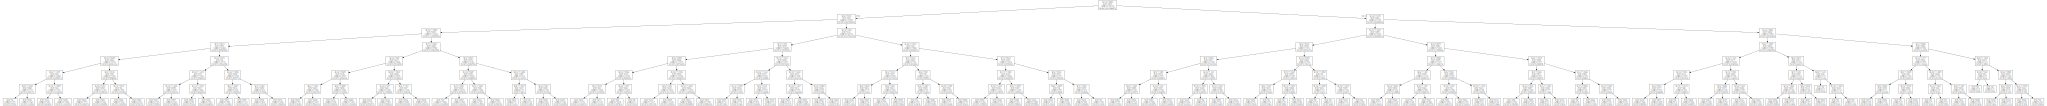

In [12]:
from sklearn import tree
import graphviz
src = tree.export_graphviz(clf)
graphviz.Source(src)